In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot 
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [38]:
df=pd.read_excel("College_Training dataset.xlsx")

In [39]:
df.head()

,Student No,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Placement
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,Placed
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,Placed
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,Placed
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,Placed
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,Placed


In [40]:
df.dtypes

Student No          int64
Gender             object
Percent_SSC       float64
Board_SSC          object
Percent_HSC       float64
Board_HSC          object
Stream_HSC         object
Percent_Degree    float64
Course_Degree      object
Placement          object
dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
Student No        300 non-null int64
Gender            289 non-null object
Percent_SSC       300 non-null float64
Board_SSC         300 non-null object
Percent_HSC       290 non-null float64
Board_HSC         300 non-null object
Stream_HSC        296 non-null object
Percent_Degree    300 non-null float64
Course_Degree     297 non-null object
Placement         300 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 23.5+ KB


In [42]:
df.describe()

,Student No,Percent_SSC,Percent_HSC,Percent_Degree
count,300.000000,300.000000,290.000000,300.000000
mean,150.500000,64.724667,63.953552,62.861733
std,86.746758,10.947700,11.399231,8.809468
min,1.000000,37.330000,40.000000,35.500000
25%,75.750000,56.000000,54.000000,57.612500
50%,150.500000,64.250000,63.000000,62.945000
75%,225.250000,74.000000,73.000000,68.422500
max,300.000000,87.200000,94.700000,86.700000


In [43]:
df.Gender.value_counts()

M    198
F     91
Name: Gender, dtype: int64

In [44]:
df.Gender.value_counts(normalize=True)

M    0.685121
F    0.314879
Name: Gender, dtype: float64

In [45]:
df.isnull().sum()

Student No         0
Gender            11
Percent_SSC        0
Board_SSC          0
Percent_HSC       10
Board_HSC          0
Stream_HSC         4
Percent_Degree     0
Course_Degree      3
Placement          0
dtype: int64

In [46]:
df.Gender.fillna("Missing",inplace=True)

In [47]:
df.Gender.value_counts()

M          198
F           91
Missing     11
Name: Gender, dtype: int64

In [48]:
df.Percent_HSC.mean()


63.953551724137924

In [49]:
df.Stream_HSC.value_counts()

Commerce    165
Science     116
Arts         15
Name: Stream_HSC, dtype: int64

In [50]:
df.Stream_HSC.fillna("Missing",inplace=True)

In [51]:
df.Stream_HSC.value_counts()

Commerce    165
Science     116
Arts         15
Missing       4
Name: Stream_HSC, dtype: int64

In [52]:
df.Course_Degree.fillna("Missing",inplace=True)

In [53]:
pd.crosstab(df.Gender,df.Placement).apply(lambda x:x/sum(x),axis=1)

Placement,Not Placed,Placed
Gender,,
F,0.208791,0.791209
M,0.156566,0.843434
Missing,0.000000,1.000000


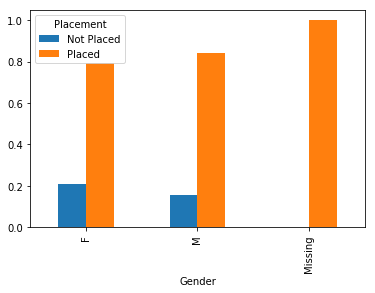

In [54]:
pd.crosstab(df.Gender,df.Placement).apply(lambda x:x/sum(x),axis=1).plot(kind="bar")

In [55]:
pd.crosstab(df.Course_Degree,df.Placement).apply(lambda x:x/sum(x),axis=1)

Placement,Not Placed,Placed
Course_Degree,,
Arts,0.250000,0.750000
Commerce,0.195402,0.804598
Computer Applications,0.250000,0.750000
Engineering,0.133333,0.866667
Management,0.134921,0.865079
Missing,0.333333,0.666667
Others,0.250000,0.750000
Science,0.136364,0.863636


In [56]:
df.Placement.value_counts()

Placed        250
Not Placed     50
Name: Placement, dtype: int64

In [57]:
d1={"Placed":1, "Not Placed":0}

In [58]:

df.placement=df.Placement.map(d1)

E:\PYTHON\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [59]:
df.Placement.value_counts()

Placed        250
Not Placed     50
Name: Placement, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DC28B00>,
      dtype=object)

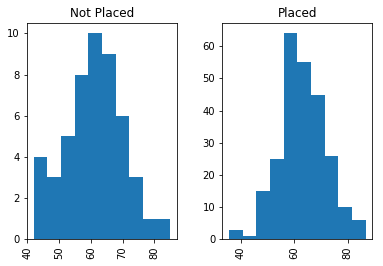

In [60]:
df.hist(column="Percent_Degree",by="Placement")

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
x = df.drop(["Student No","Placement"],axis=1)
y = df["Placement"]

In [74]:
for col in x.columns:
    if x[col].dtype == "float":
        x[col]=LabelEncoder().fit_transform(x[col])

In [75]:
df.head()

,Student No,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Placement
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,Placed
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,Placed
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,Placed
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,Placed
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,Placed


In [76]:
x.head()

,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree
0,1,50,2,116,2,1,18,7
1,1,97,1,92,2,3,104,2
2,1,80,2,98,2,1,73,3
3,1,44,0,52,0,0,36,4
4,1,48,0,28,1,3,22,3


In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.cross_validation import cross_val_score

In [78]:
from sklearn.cross_validation import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [80]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210, 8), (90, 8), (210L,), (90L,))

In [81]:
dt=DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
print cross_val_score(dt,x,y,cv=5,scoring="accuracy")
print cross_val_score(dt,x,y,cv=5,scoring="accuracy").mean()

[0.81666667 0.83333333 0.8        0.81666667 0.83333333]
0.82


In [91]:
dt.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [92]:
cross_val_score(dt,x,y,cv=3,scoring='accuracy').mean()

0.8032876620995433

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [94]:
pred_train=dt.predict(x_train)
accuracy_score(pred_train,y_train)

0.8666666666666667

In [95]:
pred_test=dt.predict(x_test)
accuracy_score(pred_test,y_test)

0.7866666666666666

In [144]:
dt.predict(x_test)==y_test

189     True
123     True
185     True
213     True
106     True
127    False
176     True
73      True
275     True
242     True
266     True
147     True
299     True
58     False
122     True
78     False
11      True
167    False
220     True
29      True
27      True
110     True
251     True
12      True
105    False
18      True
297    False
90      True
293     True
184     True
       ...  
222     True
249     True
161    False
16      True
208     True
0       True
284    False
285     True
175    False
288     True
119     True
62      True
180     True
214     True
193    False
158     True
150     True
102     True
163     True
112     True
246     True
39     False
170    False
85      True
243     True
282     True
17      True
111     True
131     True
42     False
Name: Placement, Length: 75, dtype: bool

In [137]:
print(score.mean())

NameError: name 'score' is not defined

In [96]:
rf.fit(x_train,y_train)
print accuracy_score(rf.predict(x_train),y_train)
print accuracy_score(rf.predict(x_test),y_test)

1.0
0.8


In [99]:
confusion_matrix(rf.predict(x_test),y_test)

array([[ 2,  3],
       [12, 58]], dtype=int64)

In [89]:
print(accuracy_score.mean())

NameError: name 'scores' is not defined

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, x, y, cv=10, scoring='accuracy').mean())

0.8333333333333334


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set:',logreg.score(x_test, y_test)))

SyntaxError: invalid syntax (<ipython-input-134-1474e64da021>, line 2)

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 1 13]
 [ 0 61]]
